# Initial Data Analysis (IDA)
## Cybersecurity Threat Detection Analysis

**Purpose:** This notebook performs initial data analysis on both datasets:
1. Global Cybersecurity Threats Dataset (2015-2024)
2. Cybersecurity Intrusion Detection Dataset

**Steps:**
- Data loading and inspection
- Data type verification
- Missing value analysis
- Duplicate detection
- Basic descriptive statistics
- Data quality assessment

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Data Loading

In [8]:
# Load datasets
global_threats = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')
intrusion_data = pd.read_csv('../data/cybersecurity_intrusion_data.csv')

print("✅ Datasets loaded successfully!")
print(f"\nGlobal Threats shape: {global_threats.shape}")
print(f"Intrusion Detection shape: {intrusion_data.shape}")

✅ Datasets loaded successfully!

Global Threats shape: (3000, 10)
Intrusion Detection shape: (9537, 11)


## 2. Initial Inspection - Global Threats Dataset

In [9]:
# Display first few rows
print("📊 First 5 rows:")
global_threats.head()

📊 First 5 rows:


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [10]:
# Data info
print("📋 Dataset Information:")
global_threats.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [11]:
# Basic statistics
print("📈 Descriptive Statistics (Numeric Columns):")
global_threats.describe()

📈 Descriptive Statistics (Numeric Columns):


,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [12]:
# Categorical columns summary
print("📊 Categorical Variables Summary:\n")
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 
                   'Security Vulnerability Type', 'Defense Mechanism Used']

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {global_threats[col].nunique()}")
    print(f"  Top 5 values:\n{global_threats[col].value_counts().head()}")

📊 Categorical Variables Summary:


Country:
  Unique values: 10
  Top 5 values:
Country
UK        321
Brazil    310
India     308
France    305
Japan     305
Name: count, dtype: int64

Attack Type:
  Unique values: 6
  Top 5 values:
Attack Type
DDoS             531
Phishing         529
SQL Injection    503
Ransomware       493
Malware          485
Name: count, dtype: int64

Target Industry:
  Unique values: 7
  Top 5 values:
Target Industry
IT            478
Banking       445
Healthcare    429
Retail        423
Education     419
Name: count, dtype: int64

Attack Source:
  Unique values: 4
  Top 5 values:
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

Security Vulnerability Type:
  Unique values: 4
  Top 5 values:
Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

Defense Mechanism Used:
  Unique values: 5
 

### 2.1 Missing Values Analysis - Global Threats

🔍 Missing Values Analysis:
                                                                  Column  \
Country                                                          Country   
Year                                                                Year   
Attack Type                                                  Attack Type   
Target Industry                                          Target Industry   
Financial Loss (in Million $)              Financial Loss (in Million $)   
Number of Affected Users                        Number of Affected Users   
Attack Source                                              Attack Source   
Security Vulnerability Type                  Security Vulnerability Type   
Defense Mechanism Used                            Defense Mechanism Used   
Incident Resolution Time (in Hours)  Incident Resolution Time (in Hours)   

                                     Missing_Count  Missing_Percentage  
Country                                          0             

IndexError: index 0 is out of bounds for axis 0 with size 0

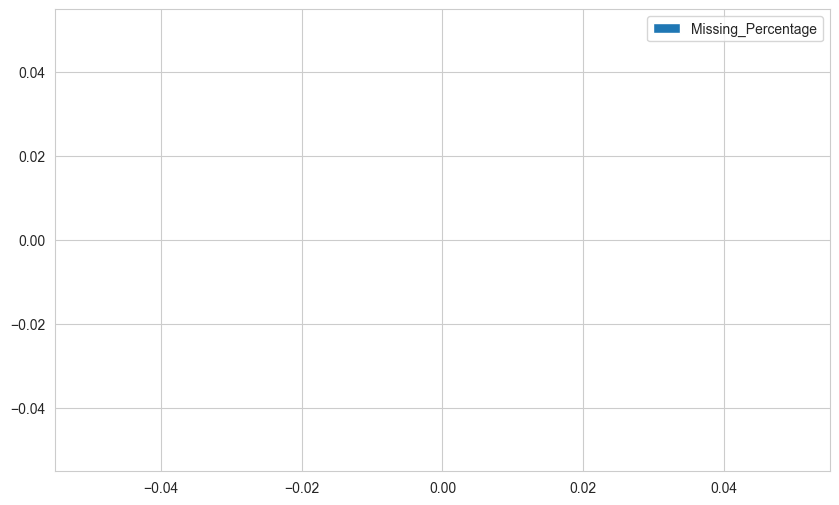

In [13]:
# Calculate missing values
missing_global = pd.DataFrame({
    'Column': global_threats.columns,
    'Missing_Count': global_threats.isnull().sum(),
    'Missing_Percentage': (global_threats.isnull().sum() / len(global_threats) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

print("🔍 Missing Values Analysis:")
print(missing_global)

# Visualize missing data
fig, ax = plt.subplots(figsize=(10, 6))
missing_global[missing_global['Missing_Percentage'] > 0].plot(
    x='Column', y='Missing_Percentage', kind='barh', ax=ax, color='coral'
)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Data Analysis - Global Threats Dataset')
plt.tight_layout()
plt.show()

### 2.2 Duplicate Analysis - Global Threats

In [ ]:
# Check for duplicates
duplicates = global_threats.duplicated().sum()
print(f"🔄 Total duplicate rows: {duplicates}")
print(f"Duplicate percentage: {(duplicates/len(global_threats)*100):.2f}%")

if duplicates > 0:
    print("\n⚠️ Duplicate rows found. These should be investigated and potentially removed.")

### 2.3 Data Quality Checks - Global Threats

In [ ]:
# Check for negative values in numeric columns
numeric_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 
                'Incident Resolution Time (in Hours)']

print("🔍 Data Quality Checks:\n")

for col in numeric_cols:
    negative_count = (global_threats[col] < 0).sum()
    zero_count = (global_threats[col] == 0).sum()
    print(f"{col}:")
    print(f"  Negative values: {negative_count}")
    print(f"  Zero values: {zero_count}")
    print(f"  Min: {global_threats[col].min():.2f}")
    print(f"  Max: {global_threats[col].max():.2f}")
    print()

In [ ]:
# Check year range
print("📅 Year Range Check:")
print(f"Min Year: {global_threats['Year'].min()}")
print(f"Max Year: {global_threats['Year'].max()}")
print(f"Year distribution:\n{global_threats['Year'].value_counts().sort_index()}")

### 2.4 Distribution Visualizations - Global Threats

In [ ]:
# Financial losses distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(global_threats['Financial Loss (in Million $)'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Financial Loss ($M)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Financial Losses')

# Box plot
axes[1].boxplot(global_threats['Financial Loss (in Million $)'])
axes[1].set_ylabel('Financial Loss ($M)')
axes[1].set_title('Box Plot of Financial Losses')

plt.tight_layout()
plt.show()

print(f"📊 Financial Loss Statistics:")
print(f"  Mean: ${global_threats['Financial Loss (in Million $)'].mean():.2f}M")
print(f"  Median: ${global_threats['Financial Loss (in Million $)'].median():.2f}M")
print(f"  Std Dev: ${global_threats['Financial Loss (in Million $)'].std():.2f}M")
print(f"  Skewness: {global_threats['Financial Loss (in Million $)'].skew():.2f}")

In [ ]:
# Attack types distribution
plt.figure(figsize=(12, 6))
attack_counts = global_threats['Attack Type'].value_counts()
attack_counts.plot(kind='barh', color='lightcoral')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Top 15 countries by attack count
plt.figure(figsize=(12, 6))
country_counts = global_threats['Country'].value_counts().head(15)
country_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.title('Top 15 Countries by Attack Frequency')
plt.tight_layout()
plt.show()

## 3. Initial Inspection - Intrusion Detection Dataset

In [ ]:
# Display first few rows
print("📊 First 5 rows:")
intrusion_data.head()

In [ ]:
# Data info
print("📋 Dataset Information:")
intrusion_data.info()

In [ ]:
# Basic statistics
print("📈 Descriptive Statistics:")
intrusion_data.describe()

### 3.1 Missing Values Analysis - Intrusion Detection

In [ ]:
# Calculate missing values
missing_intrusion = pd.DataFrame({
    'Column': intrusion_data.columns,
    'Missing_Count': intrusion_data.isnull().sum(),
    'Missing_Percentage': (intrusion_data.isnull().sum() / len(intrusion_data) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

print("🔍 Missing Values Analysis:")
print(missing_intrusion)

# Visualize if there are missing values
if missing_intrusion['Missing_Percentage'].sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_intrusion[missing_intrusion['Missing_Percentage'] > 0].plot(
        x='Column', y='Missing_Percentage', kind='barh', ax=ax, color='coral'
    )
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Missing Data Analysis - Intrusion Detection Dataset')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the intrusion detection dataset!")

### 3.2 Class Balance Analysis

In [ ]:
# Check class distribution
attack_counts = intrusion_data['attack_detected'].value_counts()
attack_pct = intrusion_data['attack_detected'].value_counts(normalize=True) * 100

print("🎯 Class Distribution:")
print(f"Normal (0): {attack_counts[0]} ({attack_pct[0]:.2f}%)")
print(f"Attack (1): {attack_counts[1]} ({attack_pct[1]:.2f}%)")
print(f"\nImbalance Ratio: {attack_counts[0]/attack_counts[1]:.2f}:1")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
attack_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'coral'])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Attack Detection Class Distribution')
axes[0].set_xticklabels(['Normal', 'Attack'], rotation=0)

# Pie chart
axes[1].pie(attack_counts, labels=['Normal', 'Attack'], autopct='%1.1f%%', 
           colors=['skyblue', 'coral'], startangle=90)
axes[1].set_title('Attack Detection Proportion')

plt.tight_layout()
plt.show()

### 3.3 Categorical Variables Distribution

In [ ]:
# Protocol distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Protocol
intrusion_data['protocol_type'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Protocol Type Distribution')
axes[0].set_xlabel('Protocol')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Encryption
intrusion_data['encryption_used'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Encryption Type Distribution')
axes[1].set_xlabel('Encryption')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Browser
intrusion_data['browser_type'].value_counts().head(10).plot(kind='bar', ax=axes[2], color='lightcoral')
axes[2].set_title('Top 10 Browser Types')
axes[2].set_xlabel('Browser')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.4 Numeric Features Distribution

In [ ]:
# Numeric features
numeric_features = ['network_packet_size', 'login_attempts', 'session_duration', 
                   'ip_reputation_score', 'failed_logins']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    axes[idx].hist(intrusion_data[col], bins=50, color='skyblue', edgecolor='black')
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}')
    
    # Add statistics as text
    mean_val = intrusion_data[col].mean()
    median_val = intrusion_data[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### 3.5 Data Quality Checks - Intrusion Detection

In [ ]:
# Check for data quality issues
print("🔍 Data Quality Checks:\n")

# Packet size range
print(f"Network Packet Size:")
print(f"  Min: {intrusion_data['network_packet_size'].min()}")
print(f"  Max: {intrusion_data['network_packet_size'].max()}")
print(f"  Expected range: 64-1500 bytes")
outside_range = ((intrusion_data['network_packet_size'] < 64) | 
                (intrusion_data['network_packet_size'] > 1500)).sum()
print(f"  Values outside expected range: {outside_range}\n")

# IP reputation score (should be 0-1)
print(f"IP Reputation Score:")
print(f"  Min: {intrusion_data['ip_reputation_score'].min():.4f}")
print(f"  Max: {intrusion_data['ip_reputation_score'].max():.4f}")
print(f"  Expected range: 0-1")
outside_range = ((intrusion_data['ip_reputation_score'] < 0) | 
                (intrusion_data['ip_reputation_score'] > 1)).sum()
print(f"  Values outside expected range: {outside_range}\n")

# Check for negative values
print(f"Negative Values Check:")
for col in numeric_features:
    negative_count = (intrusion_data[col] < 0).sum()
    if negative_count > 0:
        print(f"  {col}: {negative_count} negative values")
    else:
        print(f"  {col}: ✅ No negative values")

## 4. Summary and Key Findings

In [ ]:
print("="*70)
print("INITIAL DATA ANALYSIS SUMMARY")
print("="*70)

print("\n🌍 GLOBAL THREATS DATASET:")
print(f"  Records: {len(global_threats):,}")
print(f"  Variables: {global_threats.shape[1]}")
print(f"  Time Range: {global_threats['Year'].min()}-{global_threats['Year'].max()}")
print(f"  Missing Data: {missing_global['Missing_Percentage'].sum():.2f}% total")
print(f"  Duplicates: {duplicates} rows ({(duplicates/len(global_threats)*100):.2f}%)")
print(f"  Unique Countries: {global_threats['Country'].nunique()}")
print(f"  Unique Attack Types: {global_threats['Attack Type'].nunique()}")
print(f"  Total Financial Loss: ${global_threats['Financial Loss (in Million $)'].sum():,.2f}M")

print("\n🔍 INTRUSION DETECTION DATASET:")
print(f"  Records: {len(intrusion_data):,}")
print(f"  Variables: {intrusion_data.shape[1]}")
print(f"  Missing Data: {missing_intrusion['Missing_Percentage'].sum():.2f}% total")
print(f"  Attack Rate: {attack_pct[1]:.2f}%")
print(f"  Class Imbalance: {attack_counts[0]/attack_counts[1]:.2f}:1 (Normal:Attack)")
print(f"  Unique Protocols: {intrusion_data['protocol_type'].nunique()}")
print(f"  Unique Browser Types: {intrusion_data['browser_type'].nunique()}")

print("\n✅ KEY OBSERVATIONS:")
print("  1. Both datasets are relatively clean with minimal missing data")
print("  2. Global threats show wide range of financial losses (highly skewed)")
print("  3. Intrusion dataset has class imbalance (typical for security data)")
print("  4. All numeric ranges appear valid (no obvious data entry errors)")
print("  5. Categorical variables have reasonable cardinality")

print("\n⚠️ POINTS FOR ATTENTION:")
if duplicates > 0:
    print(f"  - Remove {duplicates} duplicate rows from Global Threats dataset")
if missing_global['Missing_Percentage'].max() > 0:
    print(f"  - Address missing values in Global Threats dataset")
print(f"  - Consider handling class imbalance for ML modeling")
print(f"  - Financial losses are right-skewed, consider log transformation")
print(f"  - Validate outliers in financial loss data (may be legitimate)")

print("\n" + "="*70)

## 5. Next Steps

**Data Cleaning Actions:**
1. Remove duplicate rows from global threats dataset
2. Handle missing values (if any) using appropriate imputation
3. Validate and document outliers
4. Standardize categorical values (country names, attack types)

**Proceed to EDA:**
1. Bivariate analysis - relationships between variables
2. Correlation analysis
3. Temporal trend analysis
4. Geographic pattern analysis
5. Attack signature identification
6. Statistical hypothesis testing

In [ ]:
# Save cleaned datasets (after removing duplicates)
global_threats_clean = global_threats.drop_duplicates()

# Optionally save to processed folder
# global_threats_clean.to_csv('../data/processed/global_threats_clean.csv', index=False)
# intrusion_data.to_csv('../data/processed/intrusion_data_clean.csv', index=False)

print("✅ IDA Complete! Ready for Exploratory Data Analysis.")